# Prueba de Modelo categorical

In [1]:
# Includes
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from matplotlib import pyplot
import numpy as np
import os, sys

In [2]:
# Función para leer la imagen

def Carga_imagen(filename, show):
    # Leemos la imagen con el tamaño 200x200
    img = load_img(filename, target_size=(224, 224))
    
    # Mostramos la imagen
    if(show == 1):
        pyplot.rcParams['figure.figsize'] = (5, 5)
        pyplot.imshow(img)
        pyplot.show()

    # Convertimos la imagen en una matriz
    img = img_to_array(img)
    # La convertimos en una imagen de un unico canal y tres dimensiones
    img = img.reshape(1, 224, 224, 3)
    img = img.astype('float32')
    img /= 255
    #print(img)
    # Información sobre el mixel central (VGG16)
    #img = img - [123.68, 116.779, 103.939]
    return img

In [1]:
# Función para predecir según el modelo

def Prueba_N(min,max):
    # Cargamos el modelo
    model = load_model('modelos/BM_Categorical.h5')
    labels = ['Gato', 'Perro']
    
    #raras = ['a','b','c','d','e']
    # 0 - 5
    # Introducimos la imagen que queremos leer
    for i in range(min,max):
        pyplot.figure(i)
        img = Carga_imagen('new_dataset/test/'+str(i)+'.jpg', 1)
        # Ejemplo de frontera de decisión
        #img = Carga_imagen('new_dataset/test/'+raras[i]+'.jpg', 1)
        # Predecimos
        p=model.predict(img)
        
        
        #print("Predicted shape",p.shape)
        print("Probabilidad Gato: " + str(p[0][0]))
        print("Probabilidad Perro: " + str(p[0][1]))
        print("\nProbabilidad máxima: ",np.max(p[0], axis=-1))
        predicted_class = labels[np.argmax(p[0], axis=-1)]
        print("Clasificado como: ", predicted_class)
        

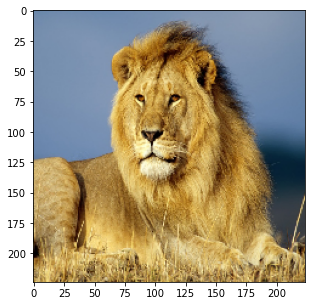

Probabilidad Gato: 0.4406031
Probabilidad Perro: 0.5593969

Probabilidad máxima:  0.5593969
Clasificado como:  Perro


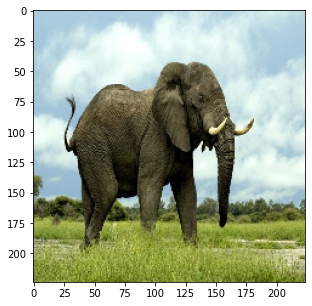

Probabilidad Gato: 2.4528083e-05
Probabilidad Perro: 0.99997544

Probabilidad máxima:  0.99997544
Clasificado como:  Perro


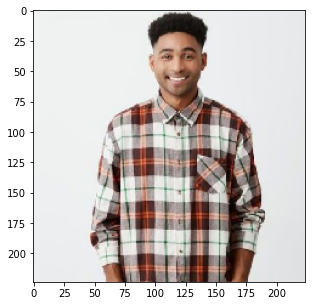

Probabilidad Gato: 0.06433058
Probabilidad Perro: 0.9356695

Probabilidad máxima:  0.9356695
Clasificado como:  Perro


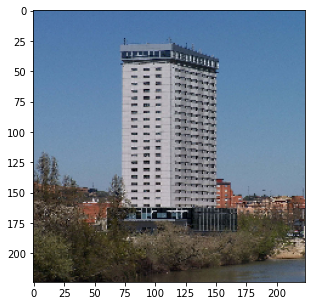

Probabilidad Gato: 0.21802986
Probabilidad Perro: 0.78197014

Probabilidad máxima:  0.78197014
Clasificado como:  Perro


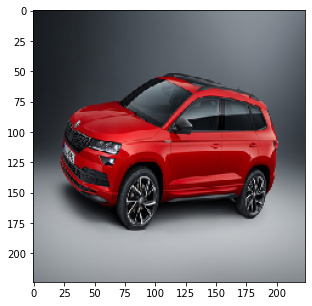

Probabilidad Gato: 0.9722387
Probabilidad Perro: 0.027761318

Probabilidad máxima:  0.9722387
Clasificado como:  Gato


In [16]:
Prueba_N(0, 5)

# Matriz de confusión

In [19]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from matplotlib import pyplot
import os, sys
import numpy as np

In [25]:
# Cargamos el modelo
model = load_model('modelos/BM_Categorical.h5')

# Teniendo en cuenta que la clase negativa son los gatos y que la clase positiva son los perros, analizamos según a ello.
# Elaboramos dos arrays, uno de y_test y otro de y_pred.

# PERRO +++

# GATO ---


origenGatos = 'new_dataset/test_classes/cats/'
origenPerros = 'new_dataset/test_classes/dogs/'

y_test = []
y_pred = []

# Guardamos las imagenes que den clase erronea
FNImages = []
FPImages = []

for nombref in os.listdir(origenGatos):
    y_test.append(0)
    src = origenGatos + '/' + nombref
    img = Carga_imagen(src, 0)
    p=model.predict(img)
    # Incrementamos los arrays
    if(np.argmax(p[0], axis=-1) == 0): # GATO
        y_pred.append(0)
    else: # PERRO
        y_pred.append(1)
        FNImages.append(nombref)
        
        
for nombref in os.listdir(origenPerros):
    y_test.append(1)
    src = origenPerros + '/' + nombref
    img = Carga_imagen(src, 0)
    p=model.predict(img)
    # Incrementamos los arrays
    if(np.argmax(p[0], axis=-1) == 0): # GATO
        y_pred.append(0)
        FPImages.append(nombref)
    else: # PERRO
        y_pred.append(1)

In [26]:
# pip install mlxtend

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

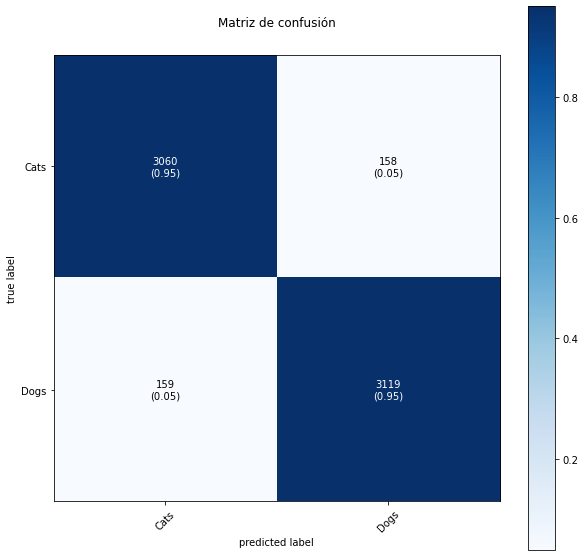

In [27]:
cnf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cnf_matrix,
                                figsize=(10,10),
                                class_names= ['Cats','Dogs'],
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)

plt.title('Matriz de confusión')
plt.show()

In [28]:
# Obtenemos todos los valores posibles directamente analizando la matriz de confusión.

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

In [29]:
f = open("Best_Categorical.txt", "w")
f.write('División por clases, [gatos , perros] \n\n')
f.write('Sensitivity(TPR) : ' + str(TPR) + '\n\n' + 'Specificity(TNR) : ' + str(TNR) + "\n\n")
f.write('Positive Predictive Value(PPV) : ' + str(PPV) + "\n\n")
f.write('Negative Predictive Value(NPV): ' + str(NPV) + "\n\n")
f.write('False Positive Rate(FPR) : ' + str(FPR) + "\n\n")
f.write('False Negative Rate(FNR): ' + str(FNR) + "\n\n")
f.write('False Dicovery Rate(FDR) : ' + str(FDR) + "\n\n")
f.write('ACCURACY TOTAL(ACC) : ' + str(ACC) + "\n\n")
f.write('FNIMAGES : ' + str(FNImages) + '\n\n' + 'FPIMAGES : ' + str(FPImages) + "\n")
f.close()